In [19]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [20]:
# Filter to United States only
df_us = df[df['job_country'] == 'United States'].copy()

In [21]:
# Create a new column 'job_posted_month' by extrating month of 'job_posted_date' column
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_us['job_posted_month']

0             June
3             July
5         November
6            March
9            April
            ...   
785673     October
785685        July
785692       April
785703     January
785705     January
Name: job_posted_month, Length: 206292, dtype: object

In [ ]:
# Turns job_posted_month column to Categorical
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_us['job_posted_month'] = pd.Categorical(df_us['job_posted_month'], categories=month_order, ordered=True)
df_us['job_posted_month']

0             June
3             July
5         November
6            March
9            April
            ...   
785673     October
785685        July
785692       April
785703     January
785705     January
Name: job_posted_month, Length: 206292, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [26]:
# Create pivot table
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size', observed=False).copy()
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

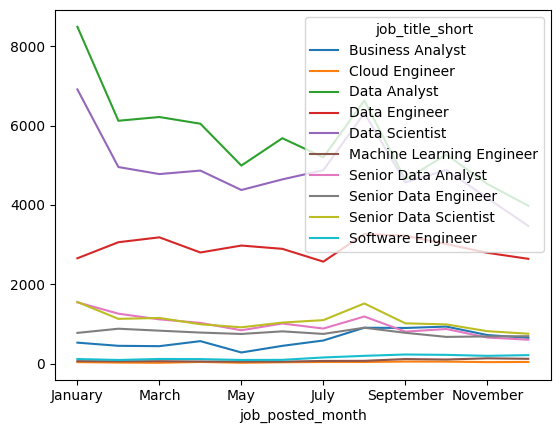

In [ ]:
df_us_pivot.plot(kind='line')

In [ ]:
# Filter to Top 3 Jobs only
top_3 = df_us['job_title_short'].value_counts().head(3).index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

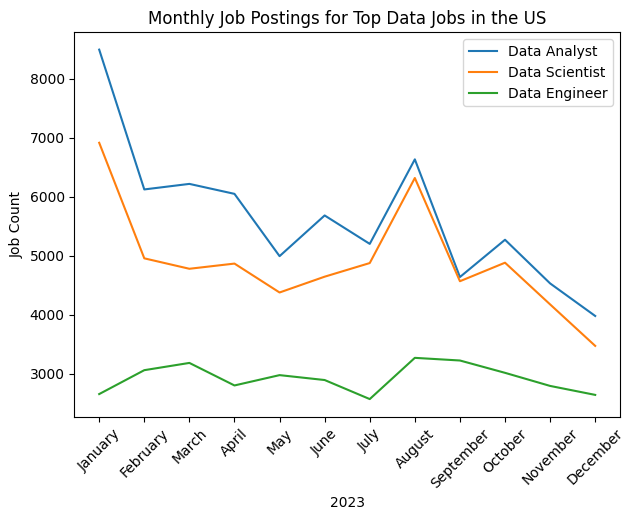

In [59]:
df_us_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.tight_layout()
plt.xticks(ticks=range(len(df_us_pivot.index)), labels=df_us_pivot.index, rotation=45)
plt.show()